# 1. Machine Learning with scikit-learn

The purpose of this project is to get an understanding of the machine learning package scikit-learn and how it synergizes with the Python ecosystem. We demonstrated the capabilities of scikit-learn through an example of image classification using support vector machines. We first classified images of handwritten digits from scikit-learn's built-in database. We then attempted to construct a more ambitious classification model to classify images of the Pokémon characters Charmander, Charmeleon, and Charizard. Through our experiments, we made some conjectures as to why certain classifications were incorrect.<br>

# Table of contents
2. Nomenclature
3. Motivation and context
4. Motivating example
5. Experiments
6. Analysis
7. Conclusion
8. References
9. Appendices

# 2. Nomenclature
$n$: often used to denote a natural number as a variable<br>
$\times$: used to denote the dimensions of an image (e.g. $8\times8$ means a rectangular image that's 8 pixels wide and 8 pixels tall)<br>
$\mathbb{R}^n$: the set of $n$-dimensional tuples consisting of real numbers<br>
$f(x)$: a function $f$ that takes a value $x$ on input and assigns it some output value, and $f(x)$ is used to represent the value $f$ assigns to $x$<br>
$\langle w,x\rangle$: the dot product of 2 vectors $w$ and $x$<br>
(Note: I didn't find myself using as much mathematical notation as I have in past projects. Is this fine?)

# 3. Motivation and context

Machine learning is a tool currently used in various industries, especially data science. It can perform tasks ranging from standard statisical analysis and regression to data classification and clustering. But how does the machine perform these tasks to generate the results they do? How accurate should we expect the generated results to be?<br>

## What is Machine Learning?
Machine learning involves a program learning from experience $E$ with respect to a set of tasks $T$ and some performance assessment $P$.<br>
Supervised and unsupervised are 2 particular forms that machine learning can take.<br>
Supervised machine learning is when input and output data are labeled. When a model makes a prediction, there is unambiguously a correct answer. Classification and regression are 2 prominent examples of supervised learning.<br>
Unsupervised machine learning doesn't learn from labeled data, and the output data isn't dictated by correctness.<br>

## About scikit-learn
The package was first developed as a project by David Cornapeau for Google Summer of Code in 2007, then Matthieu Brucher proceeded to take over and work on it as part of his Ph. D thesis.<br>
Currently this is a well-established project having around 2000 contributors and used by 332 thousand people, according to their GitHub repository.<br>
scikit-learn could be thought of as an expansion of SciPy geared towards streamlined general Machine Learning tasks. It has good synergy with NumPy's arrays and MatPlotLib's data visualization tools. The synergy between scikit-learn and other well-established Python libraries is best illustrated through experiments.<br>
scikit-learn also works well with a similar package called scikit-image, which not only has its own set of features for comparison and analysis of images, but also loads images into NumPy arrays to make it convenient for scikit-learn to work with them.<br>

# 4. Motivating example
To illustrate some of the capabilities of scikit-learn, we will classify images of handwritten digits, which scikit-learn obtained from the University of California Irvine's Machine Learning repository.<br>
Each image depicts a single numerical digit in the base 10 number system. We want our model to accurately classify the digit depicted by an image.<br>
Since each image does have an assigned digit, that means there is an unambiguous correct answer, meaning this experiment falls under supervised machine learning.<br>

# 5. Experiments
We will attempt to construct our predictive classification models using Python (version 3.9.7) in a Jupyter notebook with the assistance of the following modules: MatPlotLib (3.5.1), NumPy (version 1.22.1), Pandas (version 1.4.1), and scikit-learn (version 1.0.2). For a more ambitious experiment, we will need scikit-image (version 0.19.2) to read in images.<br>
As a mathematical object, an image is a matrix where each entry corresponds to a pixel in the image. The numerical value of the entry dictates the color of the corrsponding pixel.<br>

## Extracting the data
scikit-learn actually has a built in dataset containing test data for machine learning experiments. The images of the handwritten digits is included in this dataset.<br>
Each image of the handwritten digits is 8 by 8 pixels, and has been stored as a row vector of length 64. They can be reshaped into $8\times8$ matrices however.<br>
The first step is to load the data of the images into a Pandas dataframe. Each row of the dataframe has 64 entries to denote the color values of corresponding pixels and an additional entry to indicate the digit that image depicts. There are 1797 images in total.<br>
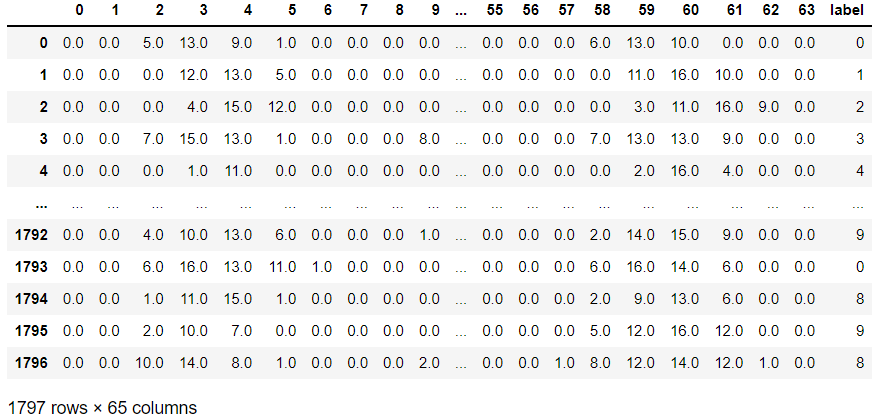<br>
Figure 1<br>
<br>
From the dataframe in figure 1, we can then extract data from its rows, store them into NumPy arrays, reshape them into $8\times8$ matrices, and use MatPlotLib to showcase what some of these images look like, as presented in figure 2.<br>
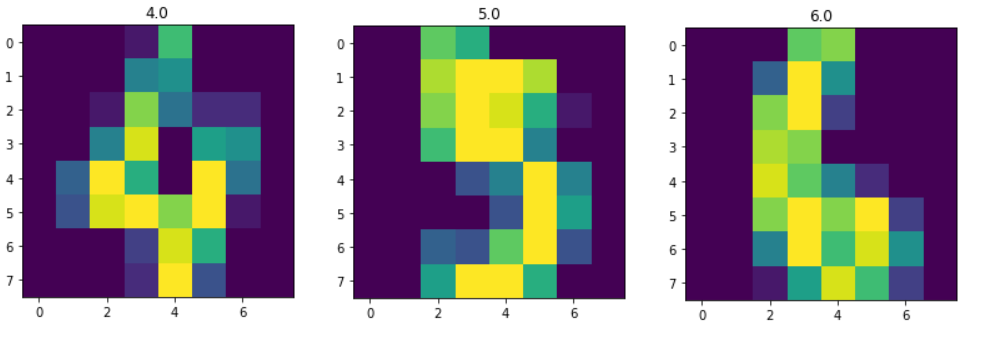<br>
Figure 2<br>

## Partitioning the data
In order to perform multiclass classification, we need to partition the data into 2 disjoint proper subsets, a training set and a testing set.<br>
The idea is that we will use the training set to construct our model and evaluate the testing set against the constructed model. We will take the first 600 images to be our training set and the rest to be the testing set.<br>

## Support Vector Machines
As it was recommended in the scikit-learn documentation page for the examples of the handwritten digits, we will be using the method of support vector machines.<br>
Each image can be interpreted as an element of $\mathbb{R}^n$<br>
Our goal is to find hyperplanes that partition $\mathbb{R}^n$ into disjoint proper subsets s.t. all data points of the same classification are in the same subset and no 2 points of different classifications are in the same subset.<br>
A hyperplane of $\mathbb{R}^n$ is a $n-1$ dimensional structure that partitions the region into 2 subsets.<br>
For example, a 2-dimensional hyperplane is a line, and a 3-dimensional hyperplane is a standard plane.<br>
Such a boundary can be modeled by the function $f(x)=\langle w,x\rangle+b$<br>
If there is no such hyperplane, add a new dimension $\mathbb{R}^{n+1}$ using the kernel trick<br>
A kernel is a function that takes 2 vectors on input and returns the dot product of those vectors mapped to a higher dimensional space. It can do so without explicitly computing the mapping of the higher dimensional vectors, however.<br>
Different types of kernels include polynomial, Gaussian, and sigmoid.<br>
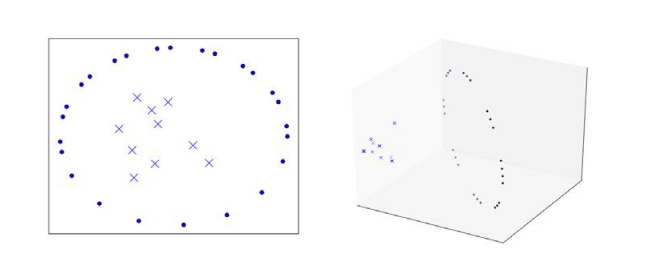
Figure 3<br><br>
Figure 3 (from the textbook *Mastering Machine Learning with scikit-learn* by Gavin Hackeling) illustrates an example of translating the figure to 3 dimensions when no 2 dimensional hyperplane or line properly splits the data.<br>
scikit-learn has a built-in subclass called $\text{sklearn.svm}$ that manages support vector machines. The command $\text{sklearn.svm.SVC()}$ takes on input a training set and returns a classifier model that can be used to classify test data.<br>

## An ambitious attempt
After the example with the handwritten digits, an ambitious attempt was made to construct a model that correctly classifies more sophisticated images.<br>
More specifically, this model was designed to recognize images of the Pokémon characters Charmander, Charmeleon, and Charizard.<br>
The images used consist of sprites and models from the Pokémon video games, which can be found on the Pokémon database sites Bulbapedia, Bulbagarden Archives, and Serebii. A sample of these images to illustrate what the characters look like are shown in figure 4.<br>
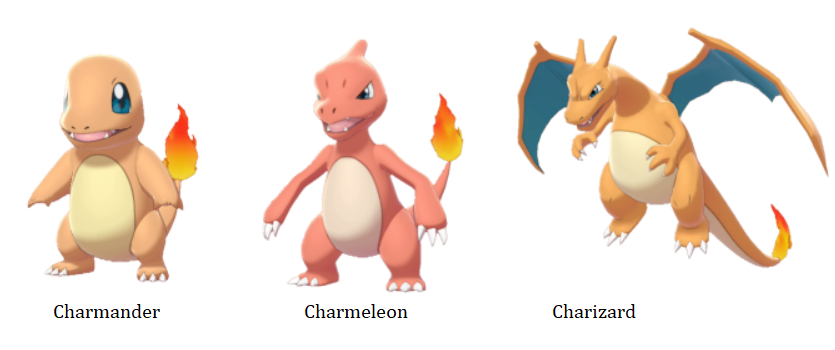
Figure 4<br><br>
While the images by default load into matrices of hexadecimal colors, meaning they contain different concentrations of red, green, and blue, they have been reformatted as grayscale images for ease of computation.<br>
These images are much larger than those of the handwritten digits, and will all be reshaped as $240\times240$ images for consistency.<br>
The art style of the in-game sprites and models differ fairly drastically by game. Because of this, the training set was selectively configured to group the sprites based on similarity in art style (8 bit, 3D models, etc.) and choosing one sprite from each group in hopes that would cover all the groups.<br>

Reorganize images to be next to each other to save space<br>
The handwritten digits come from the MNIST database so cite that (cited in lectures as well)<br>
For handwritten digits, try to justify using PCA<br>
It's fine to just theorize about cases of over/underfitting for handwritten digits without actually doing them<br>
Label EVERY figure<br>
Instead of referring to "this figure", just refer to the figure number in case pages get screwed up<br>

# 6. Analysis
Handwritten digits:<br>
The model constructed for handwritten digits seemed to have classified 95% of the images correctly.<br>
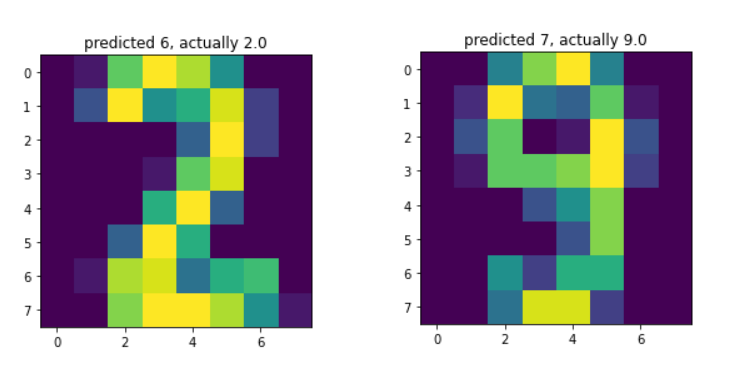
Figure 5<br><br>
The inaccuracy in some classifications like the ones depicted in figure 5 is likely due to the low resolution of the images used.<br>
In the experiment we took the first 600 images as our training set, and it resulted in pretty accurate classifications for the testing set. In theory the more images our training set has, the more accurate our predictions should be. However, there is also the danger of overfitting, where our model becomes so accustomed to the images of the training data, that it can only classify images of similar form correctly, and would fail for more general images of handwritten digits.<br>
<br>
Pokémon character classification:<br>
The resultant model ended up classifying around 60% of the test set correctly. The inaccuracy in some images were likely a result of the variations in the character's poses and the difference in art style, but ultimately the color differentials between corresponding pixels.<br>
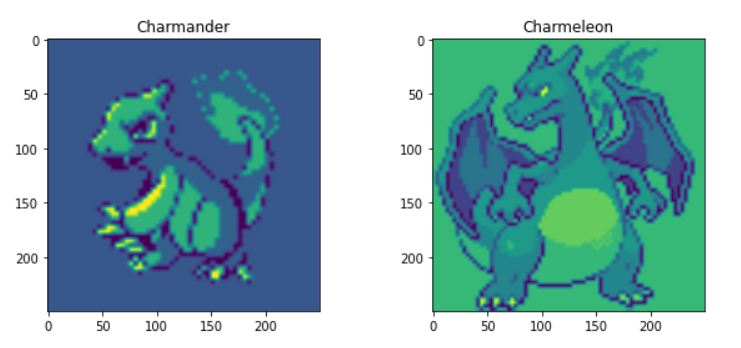
Figure 6<br><br>
In figure 6, the image on the left is supposed to be an image of Charmeleon, and the image on the right is supposed to be an image of Charizard. The image on the left of Charmeleon being predicted as Charmander is not entirely unreasonable, as Charmander and Charmeleon have somewhat similar body structures, and this is a sprite from an older game, making it difficult for the model to find the differentiating features of a Charmeleon compared to a Charmander. However, the image on the right of Charizard being predicted as Charmeleon is rather strange considering the distinctive wings that Charizard possesses.<br>

We then compared additional images from the anime (retrieved from Bulbapedia and Bulbagarden Archives) to see if they would be classified correctly. Turns out they were not.<br>
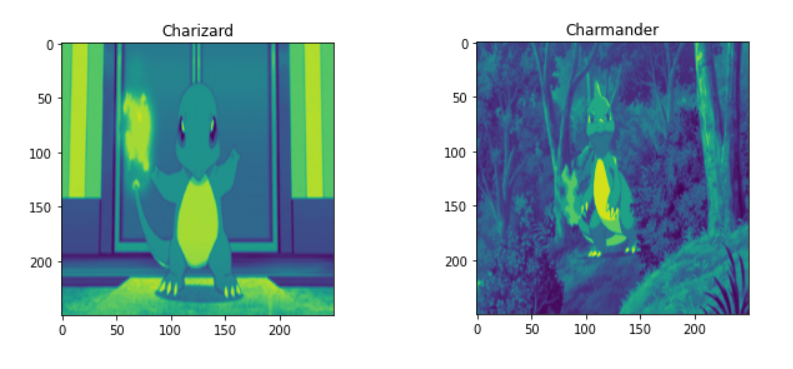
The image on the left is supposed to depict Charmander, and the image on the right is supposed to depict Charmeleon. Neither prediction was correct.<br>
This is likely a case of overfitting, where the training data only consisted of the in-game sprites and models. As a result, it fails to accurately capture general images of these characters when they are in more dynamic poses and are behind some sophisticated scenery.<br>

# 7. Conclusion
In this report, we focused on supervised machine learning in our experiments.<br>
<br>
scikit-learn is a well-established machine learning software that can perform powerful machine learning tasks such as classification using support vector machines in an accessible and efficient manner.<br>
<br>
Support vector machines involve representing data as points in $\mathbb{R}^n$ and partitioning the region using hyperplanes.<br>
Mention the training <br>
<br>
Errors in image classification are likely to be results of low resolution images (as in the case of the handwritten digits), differences in character positioning, and differences in the art style of images. All of this is likely due to the fact that the model relies on color differentials between corresponding pixels for accuracy.<br>
(Note: Is there anything more to say?)

# 8. References
Gavin Hackeling: Mastering Machine Learning with scikit-learn. Apply effective learning algorithms to real-world problems using scikit-learn. Packt publishing, 2014.<br>
<br>
 Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.<br>
<br>
 Alpaydin, E. & Kaynak, C.. (1998). Optical Recognition of Handwritten Digits. UCI Machine Learning Repository.<br>
<br>
 "Charmander (Pokémon)." Charmander (Pokémon) - Bulbapedia, the Community-Driven Pokémon Encyclopedia, bulbapedia.bulbagarden.net/wiki/Charmander_(Pokémon).<br>
<br>
 "Category:Charmander - Bulbagarden Archives." Archives.bulbagarden.net, archives.bulbagarden.net/wiki/Category:Charmander. Accessed 28 Apr. 2022.<br>
<br>
 "Serebii.net Pokédex - #004 - Charmander." www.serebii.net, www.serebii.net/pokedex/004.shtml. Accessed 28 Apr. 2022.<br>
<br>
 "Charmander #004 - Serebii.net Pokémon Mystery Dungeon Rescue Team DX." www.serebii.net, www.serebii.net/dungeonrescueteamdx/pokemon/004.shtml. Accessed 28 Apr. 2022.<br>
<br>
 "Charmeleon (Pokémon)." Charmeleon (Pokémon) - Bulbapedia, the Community-Driven Pokémon Encyclopedia, bulbapedia.bulbagarden.net/wiki/Charmeleon_(Pokémon).<br>
<br>
 "Category:Charmeleon - Bulbagarden Archives." Archives.bulbagarden.net, archives.bulbagarden.net/wiki/Category:Charmeleon. Accessed 28 Apr. 2022.<br>
<br>
 "Serebii.net Pokédex - #005 - Charmeleon." Www.serebii.net, www.serebii.net/pokedex/005.shtml. Accessed 28 Apr. 2022.<br>
<br>
 "Charmeleon #005 - Serebii.net Pokémon Mystery Dungeon Rescue Team DX." www.serebii.net, www.serebii.net/dungeonrescueteamdx/pokemon/005.shtml. Accessed 28 Apr. 2022.<br>
<br>
 "Charizard (Pokémon)." Charizard (Pokémon) - Bulbapedia, the Community-Driven Pokémon Encyclopedia, bulbapedia.bulbagarden.net/wiki/Charizard_(Pokémon).<br>
<br>
 "Category:Charizard - Bulbagarden Archives." Archives.bulbagarden.net, archives.bulbagarden.net/wiki/Category:Charizard. Accessed 28 Apr. 2022.<br>
<br>
 "Serebii.net Pokédex - #006 - Charizard." Www.serebii.net, www.serebii.net/pokedex/006.shtml. Accessed 28 Apr. 2022.<br>
<br>
 "Charizard #006 - Serebii.net Pokémon Mystery Dungeon Rescue Team DX." www.serebii.net, www.serebii.net/dungeonrescueteamdx/pokemon/006.shtml. Accessed 28 Apr. 2022.<br>
<br>
 "Charizard - Pokémon Unite." www.serebii.net, www.serebii.net/pokemonunite/pokemon/charizard.shtml. Accessed 28 Apr. 2022.<br>
<br>

# 9. Appendices

## Handwritten digits

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load in the data for handwritten digits

from sklearn import datasets

digits = datasets.load_digits() # This gives us the pixel values for each image
df1 = pd.DataFrame(digits.data) # Load the image data into a pandas dataframe
df1["label"] = digits.target # Each image has a label indicating the digit it depicts. Add this column to the dataframe
df1

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


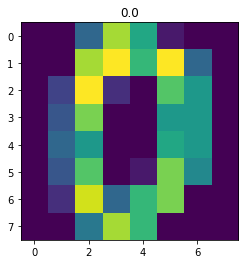

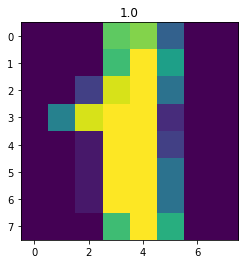

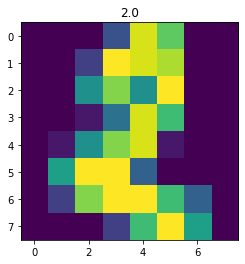

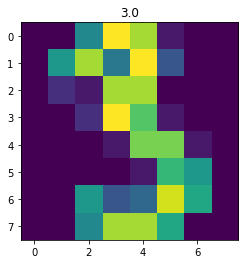

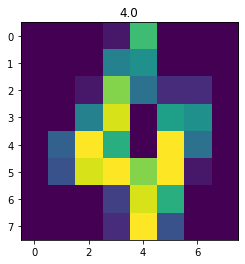

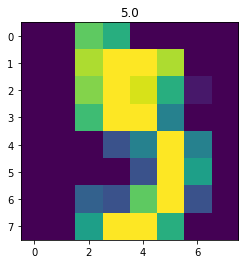

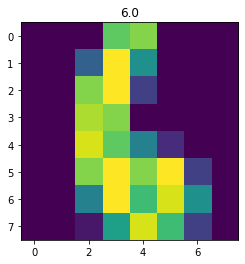

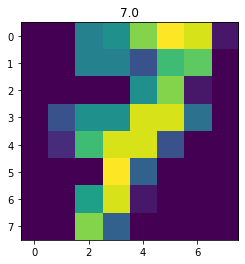

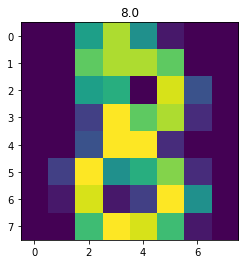

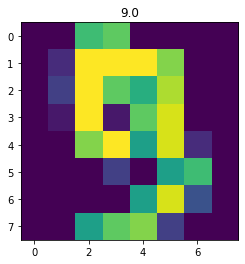

In [3]:
import warnings
warnings.filterwarnings('ignore')

for n in range(10): # Display the first 10 images in the dataset
    plt.figure()
    plt.imshow(np.reshape(np.array(list(df1.loc[n][:-1])),(8,8)))
    plt.title(df1.loc[n]["label"])

In [4]:
pixel_colnames = df1.columns[:-1] # The last column only gives information about the labels, which is our output. pixel_colnames will denote all the columns necessary for our input data

X_train, X_test, y_train, y_test = train_test_split(df1[pixel_colnames], df1['label'], train_size = 600, random_state=0, shuffle=False) # For simplicity, we will take the first 600 samples to be our training set
print("X_train\n",X_train,"\nX_test\n",X_test,"\ny_train\n",y_train,"\ny_test\n",y_test)

X_train
       0    1    2     3     4     5    6    7    8    9   ...    54   55   56  \
0    0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
1    0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
2    0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...   5.0  0.0  0.0   
3    0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...   9.0  0.0  0.0   
4    0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
..   ...  ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...  ...  ...   
595  0.0  0.0  1.0  12.0  14.0   3.0  0.0  0.0  0.0  1.0  ...   0.0  0.0  0.0   
596  0.0  0.0  5.0  13.0   2.0   0.0  0.0  0.0  0.0  0.0  ...  16.0  9.0  0.0   
597  0.0  0.0  6.0  14.0  16.0  13.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
598  0.0  0.0  0.0   6.0  13.0   8.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
599  0.0  0.0  1.0   7.0  12.0   3.0  0.0  0.0  0.0  4.0  ...  14.0  5.0  0.0   

      57    58    

In [5]:
from sklearn import svm

clf = svm.SVC(gamma=0.001) # We will create a support vector classifier. gamma=0.001 seems to yield the highest accuracy and was the value recommended in the documentation

clf.fit(X_train, y_train) # Fit our classifier to the training set
predicted = clf.predict(X_test) # Apply the model to our testing set
predicted

array([2, 1, 7, ..., 8, 9, 8])

In [6]:
assert len(predicted)==len(y_test)
correct = 0
for i in range(len(predicted)):
    if predicted[i]==y_test[600+i]:
        correct += 1
print(correct/len(predicted)) # What percentage was correct?

0.9582289055973267


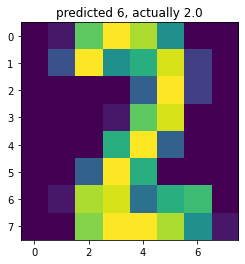

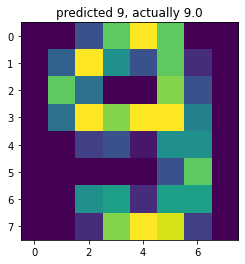

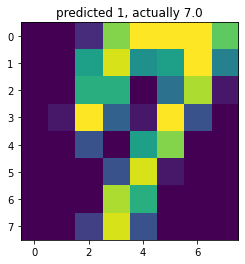

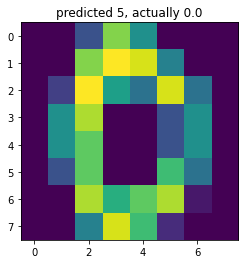

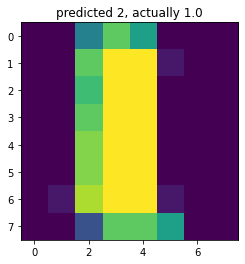

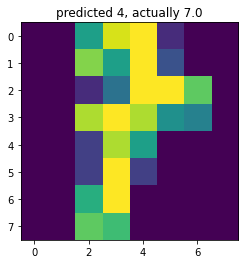

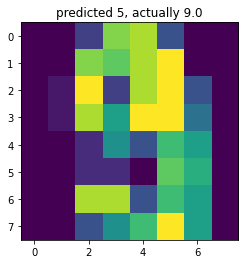

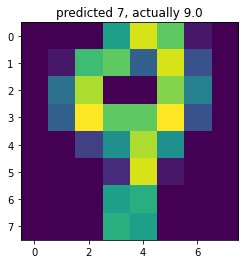

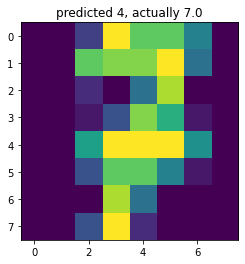

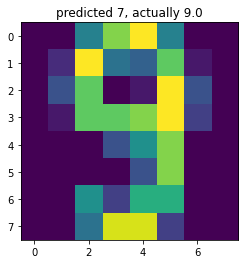

In [9]:
import random

for i in range(10): # Choose 10 random images in our test set to display
    plt.figure()
    n = random.randint(100,100+len(y_test))
    plt.imshow(np.reshape(np.array(list(df1.loc[n][:-1])),(8,8)))
    plt.title("predicted {}, actually {}".format(predicted[n-100],df1.loc[n]["label"]))

## images of Charmander, Charmeleon, and Charizard

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
import skimage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def condense_image(im): # Converts a color image to grayscale by averaging color intensities and turns it into a 1D array
    X,Y,Z = im.shape
    gray_im = im[:,:,0]
    for x in range(X):
        for y in range(Y):
            gray_im[x,y] = sum([im[x,y,z] for z in range(Z)])/Z
    return np.reshape(gray_im,X*Y)

In [2]:
games = ["","RB","DP","FRLG","XY","HOME","PMD","UNITE"]

with open("Charizard images/Charpixelsgray.csv","w") as f:
    f.write(",".join([str(n) for n in range(250*250)])+",species")
for game in games:
    Charmander = condense_image(skimage.transform.resize(imread("Charizard images/Charmander"+game+".png"),(250,250,4)))
    Charmeleon = condense_image(skimage.transform.resize(imread("Charizard images/Charmeleon"+game+".png"),(250,250,4)))
    Charizard = condense_image(skimage.transform.resize(imread("Charizard images/Charizard"+game+".png"),(250,250,4)))
    with open("Charizard images/Charpixelsgray.csv","a") as f:
        s = ""
        for c in zip([Charmander,Charmeleon,Charizard],["Charmander","Charmeleon","Charizard"]):
            s = s+"\n"+",".join([str(n) for n in c[0]])+","+c[1]
        f.write(s)

In [3]:
test_games = ["Y","GS","E","HGSS","BW","SM","SS","OldPMD","Trozei"]

for game in test_games:
    Charmander = condense_image(skimage.transform.resize(imread("Charizard images/Charmander"+game+".png"),(250,250,4)))
    Charmeleon = condense_image(skimage.transform.resize(imread("Charizard images/Charmeleon"+game+".png"),(250,250,4)))
    Charizard = condense_image(skimage.transform.resize(imread("Charizard images/Charizard"+game+".png"),(250,250,4)))
    with open("Charizard images/Charpixelsgray.csv","a") as f:
        s = ""
        for c in zip([Charmander,Charmeleon,Charizard],["Charmander","Charmeleon","Charizard"]):
            s = s+"\n"+",".join([str(n) for n in c[0]])+","+c[1]
        f.write(s)

In [4]:
df = pd.read_csv("Charizard images/Charpixelsgray.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,species
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Charmander
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Charmeleon
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Charizard
3,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,...,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,Charmander
4,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,...,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,Charmeleon
5,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,...,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,0.556863,Charizard
6,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,Charmander
7,0.443137,0.443137,0.443137,0.443137,0.443137,0.443137,0.443137,0.443137,0.443137,0.443137,...,0.443137,0.443137,0.443137,0.443137,0.443137,0.443137,0.443137,0.443137,0.443137,Charmeleon
8,0.459804,0.459804,0.459804,0.459804,0.459804,0.459804,0.459804,0.459804,0.459804,0.459804,...,0.459804,0.459804,0.459804,0.459804,0.459804,0.459804,0.459804,0.459804,0.459804,Charizard
9,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,...,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,Charmander


In [5]:
pixel_colnames = df.columns[:-1]
pixel_colnames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '62490', '62491', '62492', '62493', '62494', '62495', '62496', '62497',
       '62498', '62499'],
      dtype='object', length=62500)

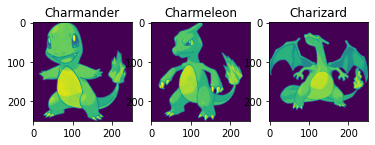

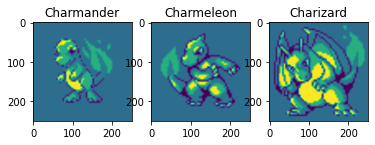

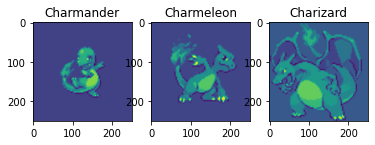

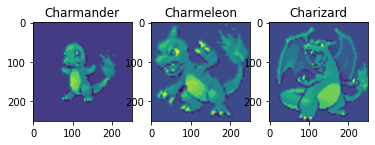

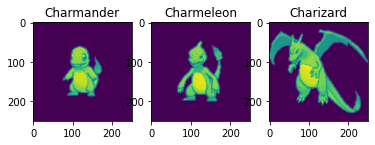

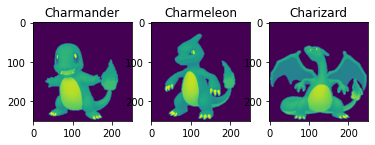

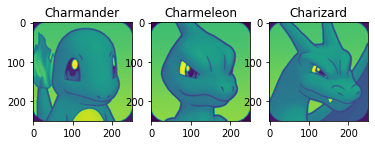

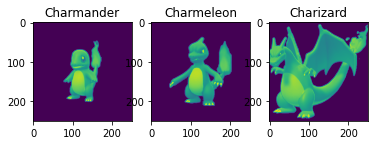

In [6]:
import warnings
warnings.filterwarnings('ignore')

Char = ["Charmander","Charmeleon","Charizard"]
for i in range(len(games)):
    fig, axes = plt.subplots(1,3)
    for j in range(3):
        axes[j].imshow(np.reshape(np.array([float(d) for d in df.loc[3*i+j][:-1]]),(250,250)))
        axes[j].set_title(Char[j])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[pixel_colnames], df['species'], train_size = 3*len(games), random_state=0, shuffle=False)
print("X_train\n",X_train,"\nX_test\n",X_test,"\ny_train\n",y_train,"\ny_test\n",y_test)

X_train
            0         1         2         3         4         5         6  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.556863  0.556863  0.556863  0.556863  0.556863  0.556863  0.556863   
4   0.556863  0.556863  0.556863  0.556863  0.556863  0.556863  0.556863   
5   0.556863  0.556863  0.556863  0.556863  0.556863  0.556863  0.556863   
6   0.427451  0.427451  0.427451  0.427451  0.427451  0.427451  0.427451   
7   0.443137  0.443137  0.443137  0.443137  0.443137  0.443137  0.443137   
8   0.459804  0.459804  0.459804  0.459804  0.459804  0.459804  0.459804   
9   0.219608  0.219608  0.219608  0.219608  0.219608  0.219608  0.219608   
10  0.219608  0.219608  0.219608  0.219608  0.219608  0.219608  0.219608   
11  0.219608  0.219608  0.219608  0.219608  0.219608  0.219608  0.219608   
12 

In [9]:
from sklearn import svm

clf = svm.SVC(gamma=0.001)

clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
predicted

array(['Charmander', 'Charmander', 'Charizard', 'Charmeleon',
       'Charmeleon', 'Charizard', 'Charmeleon', 'Charmeleon',
       'Charmeleon', 'Charmeleon', 'Charmeleon', 'Charmeleon',
       'Charmander', 'Charmeleon', 'Charizard', 'Charmander',
       'Charmeleon', 'Charizard', 'Charmeleon', 'Charmeleon', 'Charizard',
       'Charmeleon', 'Charmeleon', 'Charmeleon', 'Charmeleon',
       'Charmeleon', 'Charizard'], dtype=object)

In [10]:
assert len(predicted)==len(y_test)
correct = 0
for i in range(len(predicted)):
    if predicted[i]==y_test[len(y_train)+i]:
        correct += 1
print(correct/len(predicted))

0.6296296296296297


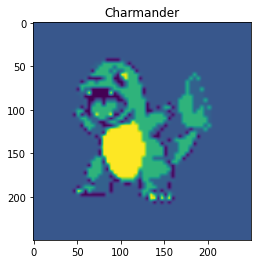

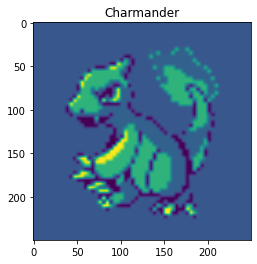

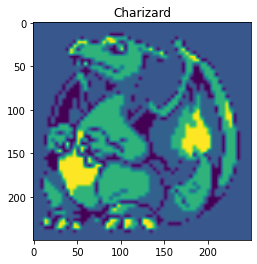

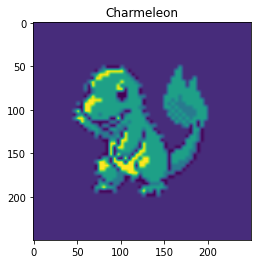

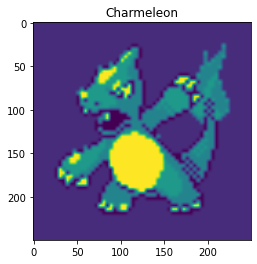

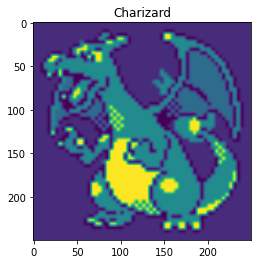

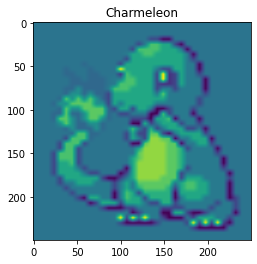

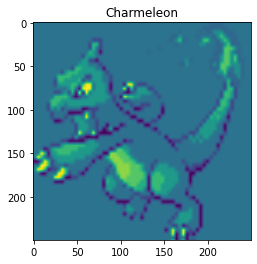

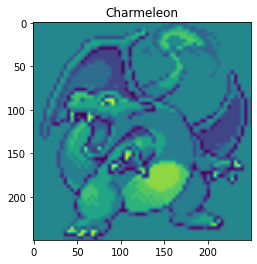

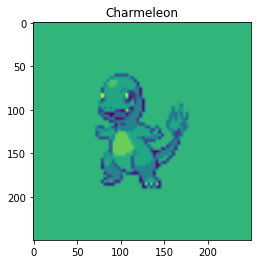

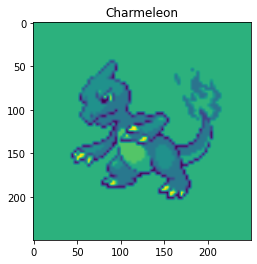

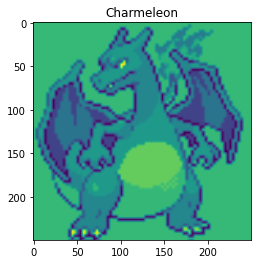

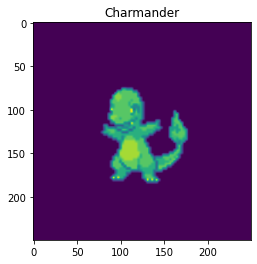

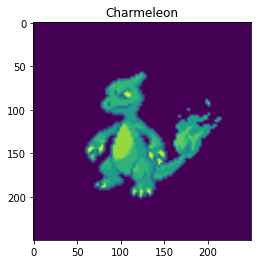

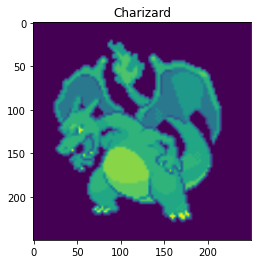

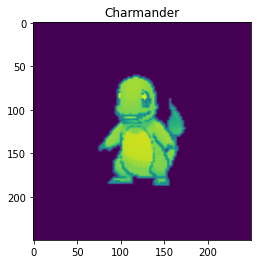

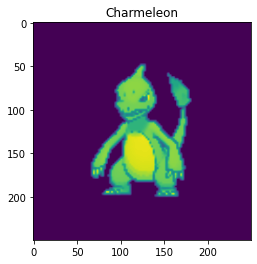

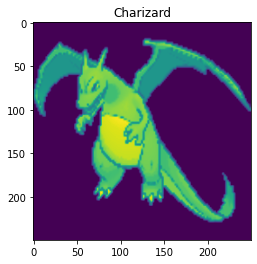

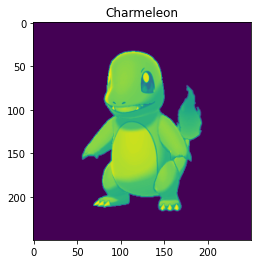

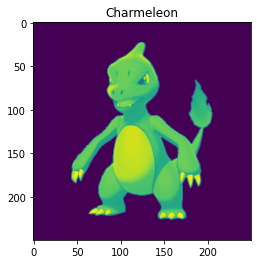

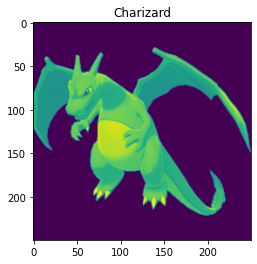

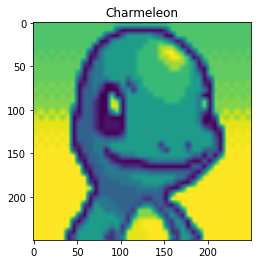

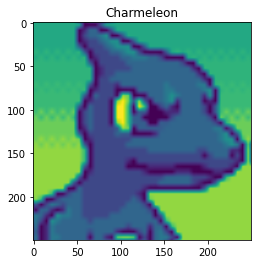

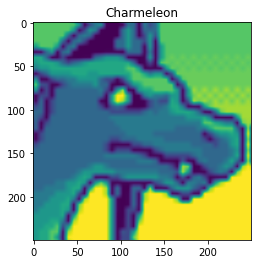

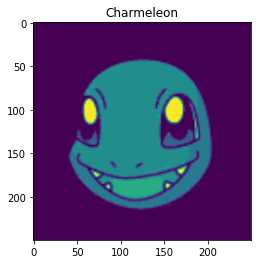

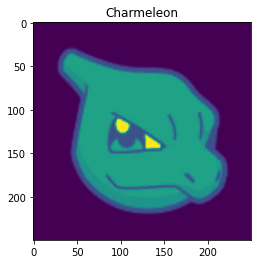

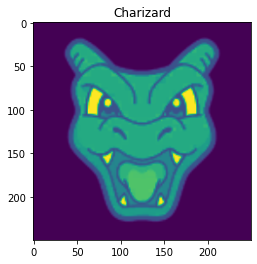

In [11]:
import warnings
warnings.filterwarnings('ignore')

for i in range(len(y_test)):
    plt.figure()
    plt.imshow(np.reshape(np.array([float(d) for d in df.loc[len(y_train)+i][:-1]]),(250,250)))
    plt.title(predicted[i])

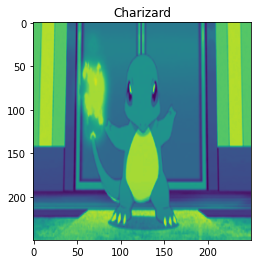

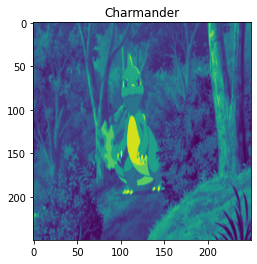

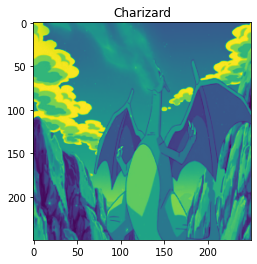

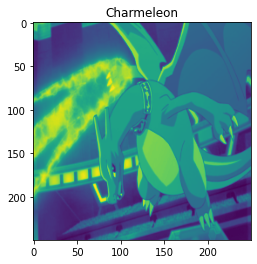

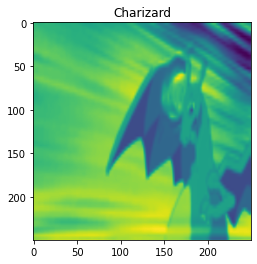

In [12]:
imgs = [condense_image(skimage.transform.resize(imread("Charizard images/test/"+filename+".png"),(250,250,4))) for filename in ["RedCharmander","AnimeCharmeleon","NewEvoCharizard","CharizardDragonClaw","CharizardPunch"]]
for img in zip(imgs,clf.predict(imgs)):
    plt.figure()
    plt.imshow(np.reshape(img[0],(250,250)))
    plt.title(img[1])

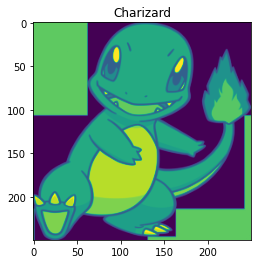

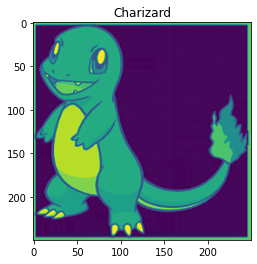

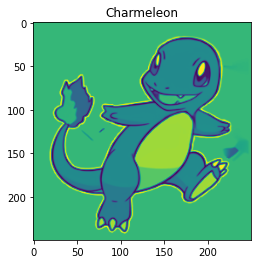

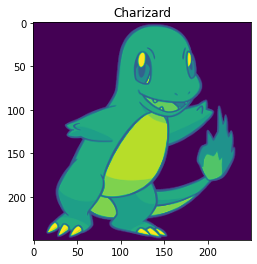

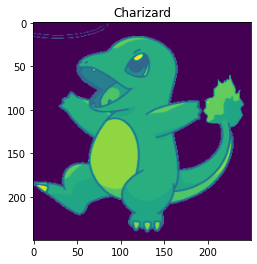

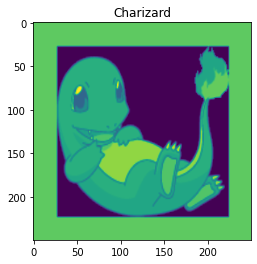

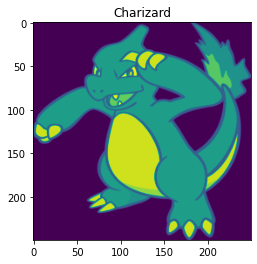

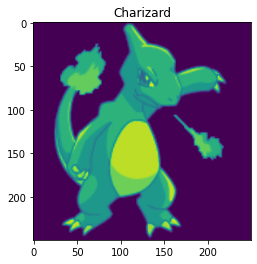

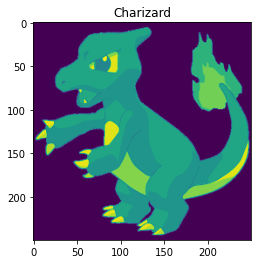

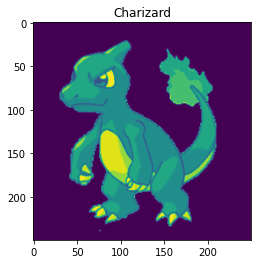

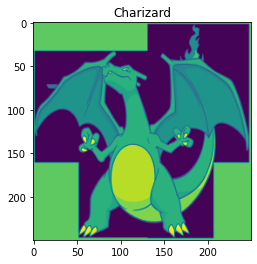

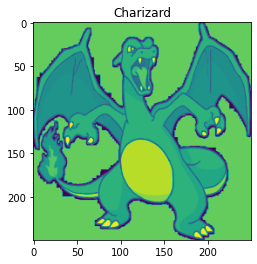

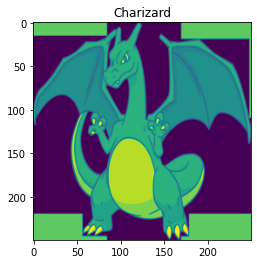

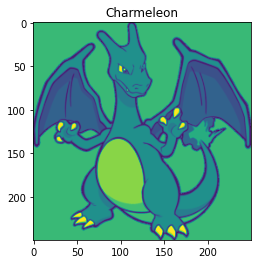

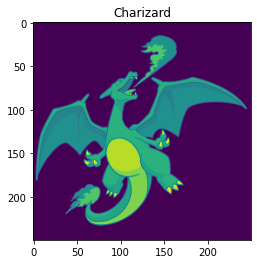

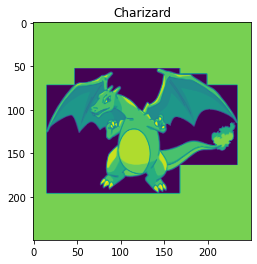

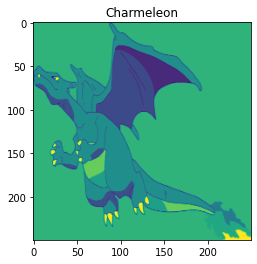

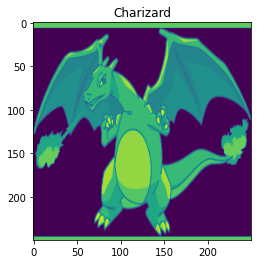

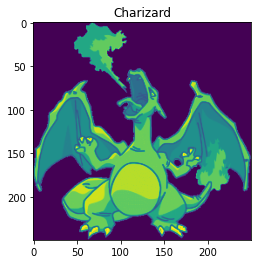

In [21]:
dreams = []
for c in ["Charmander","Charmeleon","Charizard"]:
    i = 1
    while True:
        try:
            dreams.append(condense_image(skimage.transform.resize(imread("Charizard images/{}Dream{}.png".format(c,i)),(250,250,4))))
            i += 1
        except:
            break

guesses = clf.predict(dreams)
for dream in zip(dreams,guesses):
    plt.figure()
    plt.imshow(np.reshape(dream[0],(250,250)))
    plt.title(dream[1])